# Not too sure what this is yet, just drafting

In [210]:
import quandl 
import pandas as pd
import numpy as np

In [211]:
symbs = ['AAPL','GOOGL','AMZN','NFLX']
universe = [quandl.get(("WIKI/" + str(symbol)), start_date="1995-10-01", end_date="2012-01-01")
            for symbol in symbs]


In [212]:
## Just do for Close Prices for now (1/1/2018)
for df, symbol in zip(universe, symbs):
    df.drop(df.columns[4:11],axis=1,inplace=True)
    df['pct_change'] = df.Close.pct_change()
    df['log return'] = np.log(df.Close/df.Close.shift(1))
    df['Ticker'] = str(symbol)
    


In [213]:
universe[0].head()

,Open,High,Low,Close,Adj. Volume,pct_change,log return,Ticker
Date,,,,,,,,
1995-10-02,37.75,38.50,37.50,37.63,98000000.0,NaN,NaN,AAPL
1995-10-03,38.13,38.50,37.13,37.63,72455600.0,0.000000,0.000000,AAPL
1995-10-04,36.63,37.00,36.00,36.38,66693200.0,-0.033218,-0.033782,AAPL
1995-10-05,36.25,36.63,35.88,36.50,61017600.0,0.003299,0.003293,AAPL
1995-10-06,36.75,37.00,35.63,35.69,77260400.0,-0.022192,-0.022442,AAPL


In [214]:
stock_logret_dict = {symbol: stock['log return'].dropna() for stock, symbol in zip(universe,symbs)}

In [215]:
stock_logret_df = pd.DataFrame.from_dict(stock_logret_dict)

In [216]:
stock_logret_df.head()

,AAPL,AMZN,GOOGL,NFLX
Date,,,,
1995-10-03,0.000000,NaN,NaN,NaN
1995-10-04,-0.033782,NaN,NaN,NaN
1995-10-05,0.003293,NaN,NaN,NaN
1995-10-06,-0.022442,NaN,NaN,NaN
1995-10-09,-0.024966,NaN,NaN,NaN


array([<matplotlib.axes._subplots.AxesSubplot object at 0x1100dc6d8>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x1107ba518>], dtype=object)

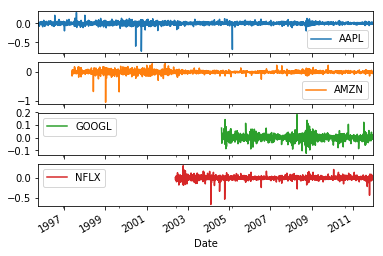

In [217]:
import matplotlib.pyplot as plt

stock_logret_df.plot(subplots=True)

In [218]:
# Testing distributions
import scipy.stats
import matplotlib.pyplot as plt
size = 30000
dist_names = ['gamma', 'beta', 'rayleigh', 'norm', 'pareto']

dist = scipy.stats.gamma
param = dist.fit(stock_logret_df[stock])

fit = scipy.stats.gamma.pdf(stock_logret_df[stock], param[0], param[1], param[2])
plt.plot(stock_logret_df[stock],'-')



KeyError: 'GOOG'

In [ ]:
## Try different quandl call

